In [1]:
# used to change filepaths
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey
from skimage.transform import resize

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

# import accuracy_score from sklearn's metrics module
from sklearn.metrics import roc_curve, auc, accuracy_score

Definition of function which allows to display image of bees from dataset

In [2]:
labels = pd.read_csv(
'/Users/juansantateresagomez/Desktop/small_DS_exercises/juan/Projects/dataset/train_labels.csv', index_col=0)

In [3]:
labels.head()

,genus
id,
520,1.0
3800,1.0
3289,1.0
2695,1.0
4922,1.0


In [11]:
def get_image(row_id, 
              root='/Users/juansantateresagomez/Desktop/small_DS_exercises/juan/Projects/dataset/images/train/'):
    
    filename = '{}.jpg'.format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    
    return resize(np.array(img),(100,100))
    

Subset dataframe to Apis (genus 0.0) and get the value of the sixth item of the set

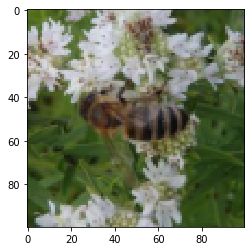

In [12]:
apis_row = labels[labels['genus']== 0.0].index[5]

plt.imshow(get_image(apis_row))

In [6]:
apis = get_image(apis_row
                )
apis.dtype

dtype('float64')

In [7]:
apis_rs = resize(apis, (100,100))

In [8]:
apis_rs.dtype

dtype('float64')

Subset dataframe to bombus (genus 1.0) and get the value of the fith item of the set

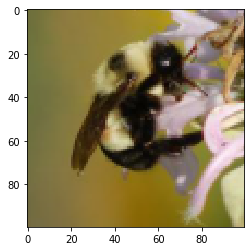

In [14]:
bombus_row = labels[labels['genus']== 1.0].index[5]
bombus_img = get_image(bombus_row)

plt.imshow(bombus_img)

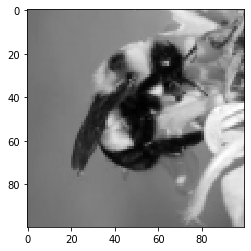

In [19]:
grey_bombus = rgb2grey(bombus_img)
plt.imshow(grey_bombus, cmap ='gray')

In [20]:
hog_features, hog_image = hog(grey_bombus,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

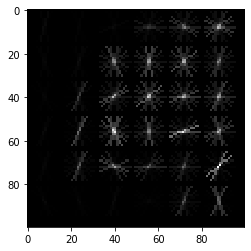

In [21]:
plt.imshow(hog_image, cmap = 'gray')

Create image features and flatten into a single row

In [22]:
def create_features(img):
    color_features = np.ndarray.flatten(img)
    grey_image = rgb2grey(img)
    hot_features = hog(grey_image, 
                      visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))
    flat_features = np.hstack((color_features, hot_features))
    
    return flat_features
    

In [23]:
bombus_features = create_features(bombus_img)

/Users/juansantateresagomez/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [24]:
bombus_features.shape

(30002,)

loop over images 


In [27]:
def create_features_matrix(label_dataframe):
    features_list = []
    
    for img_id in label_dataframe.index:
        img = get_image(img_id)
        image_features = create_features(img)
        features_list.append(image_features)
        
    feature_matrix = np.array(features_list)
    return feature_matrix

In [29]:
%%time 
feature_matrix = create_features_matrix(labels)

CPU times: user 2min 19s, sys: 25.4 s, total: 2min 45s
Wall time: 1min


/Users/juansantateresagomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
